In [2]:
import netCDF4 as nc
import datetime as dt
import xarray as xr
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties



In [3]:
 def hs(e):
    """
    Estimate Hs through the standard deviation of the signal.

    > The significant wave height is defined and calculated as the mean of the top 1/3 waves in a given record.

    Args:

        e: elevation

    Returns:

        (float) hs
    """
    return 4 * np.nanstd(e)

In [4]:
def get_index(dataset,timestamp) -> int:
    return np.argmin(np.abs(dataset.time.values-timestamp))

In [5]:
dataset_h = xr.open_dataset("herdla.nc")
dataset_f  =xr.open_dataset("frekhaug.nc")
dataset_m = xr.open_dataset("masfjorden.nc")

start_time_idx = get_index(dataset_h,np.datetime64("2023-02-19T18:00:00"))
end_time_idx = get_index(dataset_h,np.datetime64("2023-02-20T18:00:00"))

data = dataset_h.isel({"time":slice(start_time_idx,end_time_idx)}).w_z

data_f = dataset_f.isel({"time":slice(start_time_idx,end_time_idx)}).w_z

# data_m = dataset_m.isel({"time":slice(start_time_idx, end_time_idx)})w.z

# full_time_h = np.array(dataset_h.time, dtype='datetime64[ns]')
full_time_h = pd.to_datetime(dataset_h.time.values)
full_values_h = np.array(dataset_h.w_z)
df_h = pd.DataFrame({'time': full_time_h, 'value': full_values_h})
df_h.set_index('time', inplace=True)
binned_data_h = df_h.resample('H').mean()


# full_time_f = dataset_f.time(dataset_f.time, dtype='datetime64[ns]')
full_time_f = pd.to_datetime(dataset_f.time.values)
full_values_f = np.array(dataset_f.w_z)
df_f = pd.DataFrame({'time': full_time_f, 'value': full_values_f})
df_f.set_index('time', inplace=True)
binned_data_f = df_f.resample('H').mean()


# full_time_m = dataset_m.time(dataset_m.time, dtype='datetime64[ns]')
full_time_m = pd.to_datetime(dataset_m.time.values)
full_values_m = np.array(dataset_m.w_z)
df_m = pd.DataFrame({'time': full_time_m, 'value': full_values_m})
df_m.set_index('time', inplace=True)
binned_data_m = df_m.resample('H').mean()

print(binned_data_h.values)


time_h = data.time
pos_h = data.values

time_f = data_f.time
pos_f = data_f.values

# dataset_h.time 
# time_f

[[9.688867 ]
 [9.690924 ]
 [9.691278 ]
 [9.691481 ]
 [9.692034 ]
 [9.691223 ]
 [9.691483 ]
 [9.69172  ]
 [9.690518 ]
 [9.688465 ]
 [9.688251 ]
 [9.630639 ]
 [9.623069 ]
 [9.6193285]
 [9.614022 ]
 [9.61136  ]
 [9.6121645]
 [9.614438 ]
 [9.617715 ]
 [9.620149 ]
 [9.622057 ]
 [9.623839 ]
 [9.623197 ]
 [9.624247 ]
 [9.6244955]
 [9.621595 ]
 [9.6202545]
 [9.621538 ]
 [9.621322 ]
 [9.621571 ]
 [9.624075 ]
 [9.624169 ]
 [9.627474 ]
 [9.626062 ]
 [9.622816 ]
 [9.624772 ]
 [9.619772 ]
 [9.617788 ]
 [9.622099 ]
 [9.619804 ]
 [9.6282   ]
 [9.633559 ]
 [9.631051 ]
 [9.630293 ]
 [9.628764 ]
 [9.626253 ]
 [9.633055 ]
 [9.635683 ]
 [9.633985 ]
 [9.631833 ]
 [9.627652 ]
 [9.629813 ]
 [9.626663 ]
 [9.629011 ]
 [9.631524 ]
 [9.631875 ]
 [9.633168 ]
 [9.630307 ]
 [9.627424 ]
 [9.625074 ]
 [9.625031 ]
 [9.621702 ]
 [9.621535 ]
 [9.620256 ]
 [9.620748 ]
 [9.621994 ]
 [9.617339 ]
 [9.615658 ]
 [9.615589 ]
 [9.616684 ]
 [9.615342 ]
 [9.611222 ]
 [9.605654 ]
 [9.614584 ]
 [9.616083 ]
 [9.618665 ]
 [9.62376  ]

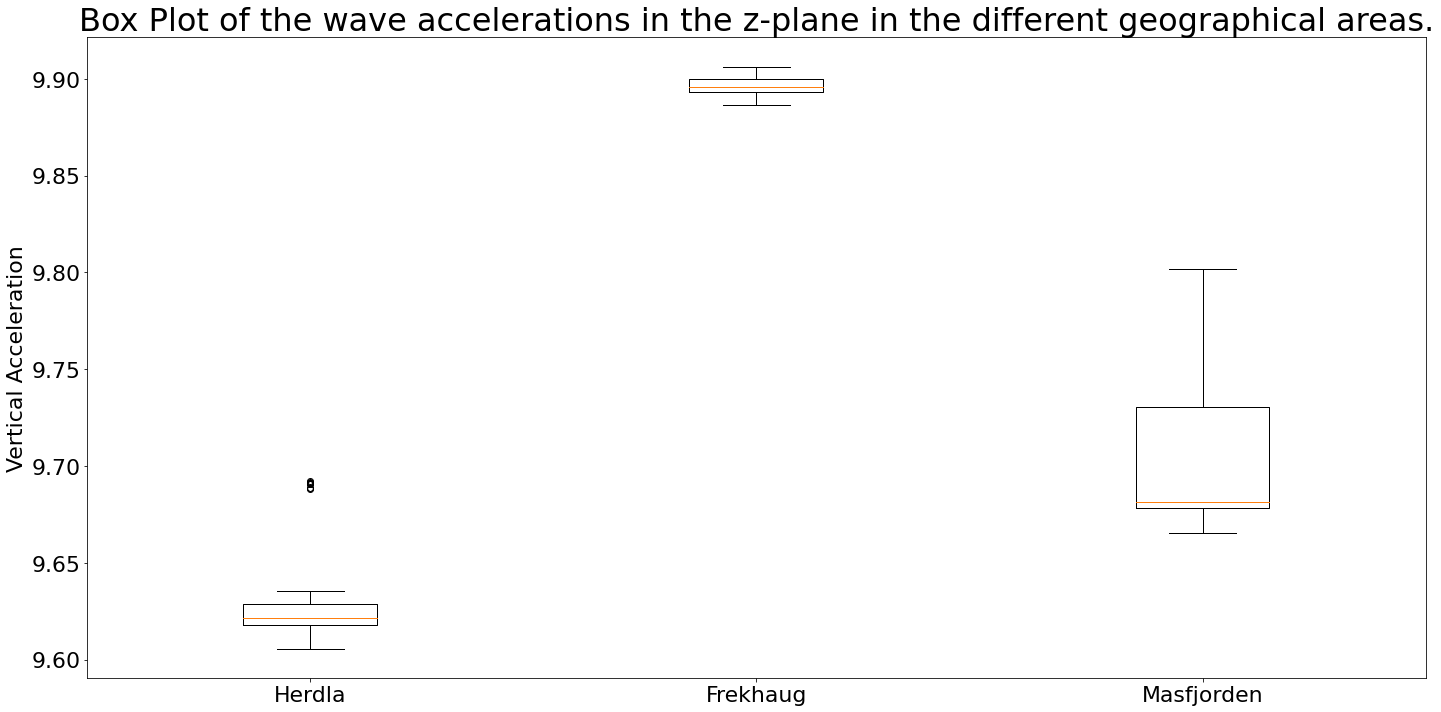

In [6]:
import matplotlib.pyplot as plt

values_herdla = np.array(binned_data_h.values)
values_frekhaug = np.array(binned_data_f.values)
values_masfjorden = np.array(binned_data_m.values)

min_length = min(len(values_herdla), len(values_frekhaug), len(values_masfjorden))

subset_herdla = values_herdla[:min_length]
subset_frekhaug = values_frekhaug[:min_length]
subset_masfjorden = values_masfjorden[:min_length]

data = np.column_stack((subset_herdla, subset_frekhaug, subset_masfjorden))

labels = ["Herdla", "Frekhaug", "Masfjorden"]

fig, ax = plt.subplots(figsize = (20,10))

ax.boxplot(data, labels=labels)

ax.set_ylabel("Vertical Acceleration", fontsize = 22)
ax.set_title("Box Plot of the wave accelerations in the z-plane in the different geographical areas.", fontsize = 32)
# ax.set_xticks(fontsize = 22)
# ax.set_yticks(fontsize = 22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)


plt.tight_layout()
plt.savefig("boxplots210.pdf")
plt.show()


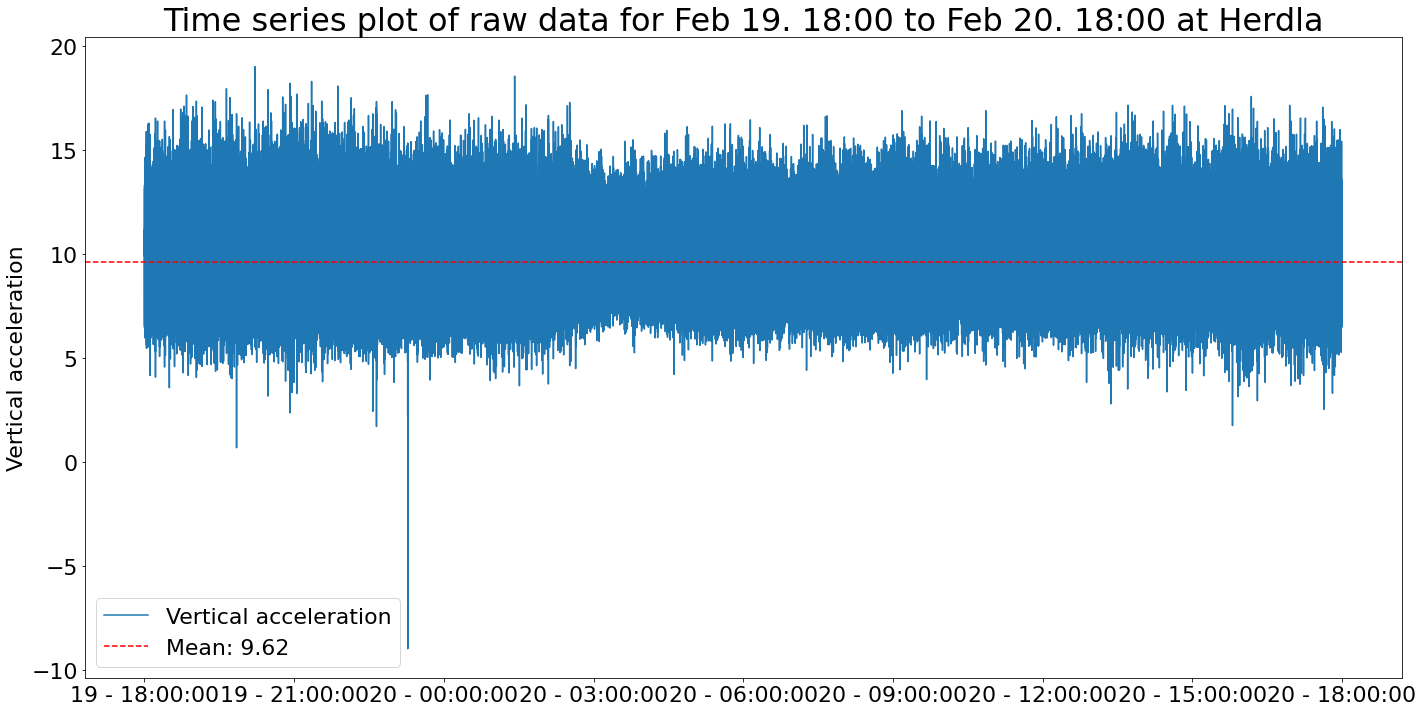

In [9]:
mean_herdla = np.mean(pos_h)
var_herdla = np.var(pos_h)
median_h = np.median(pos_h)
standard_dev_herdla = np.std(pos_h)


fig, ax = plt.subplots(figsize=(20, 10))
timeFmt = mdates.DateFormatter('%d - %H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)

# table_data = [
#     ["Metric", "Value"],
#     ["Mean", "{:.6f}".format(mean_herdla)],
#     ["Variance",  "{:.6f}".format(var_herdla)],
#     ["Median", "{:.6f}".format(median_h)],
#     ["Standard Deviation", "{:.6f}".format(standard_dev_herdla)]

# ]

# table = ax.table(cellText=table_data, loc='bottom', cellLoc='center', bbox=[0, -0.2, 1, 0.1])
# table.auto_set_font_size(False)
# table.set_fontsize(22)
# table.scale(1, 1.5)

font = FontProperties(weight='bold')
# for (i, j), cell in table._cells.items():
#     if i == 0:
#         cell.set_text_props(fontproperties=font)


ax.plot(time_h, pos_h, label='Vertical acceleration')
ax.axhline(y=mean_herdla, color='r', linestyle='--', label=f'Mean: {mean_herdla:.2f}')
# ax.axhline(y=var_herdla, color='g', linestyle='--', label=f'Variance: {var_herdla:.2f}')
# ax.axhline(y=median_h, color='b', linestyle='--', label=f'Median: {median_h:.2f}')
ax.legend(fontsize = 22)

# ax.set_ylim(-1, 1)
# ax.set_yticks(np.arange(-1, 1, 0.1))

    # Add a title to the figure
ax.set_title('Time series plot of raw data for Feb 19. 18:00 to Feb 20. 18:00 at Herdla', fontsize = 32)
ax.set_ylabel('Vertical acceleration', fontsize = 22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)

plt.tight_layout()
plt.savefig("rawdata210Herdla.pdf")
plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_12392\3432255248.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\victo\AppData\Local\Temp\ipykernel_12392\3432255248.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("herdla210trimmed.pdf")
C:\Users\victo\AppData\Local\Temp\ipykernel_12392\3432255248.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("herdla210trimmed.pdf")
c:\Users\victo\anaconda3\envs\GEOF105\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


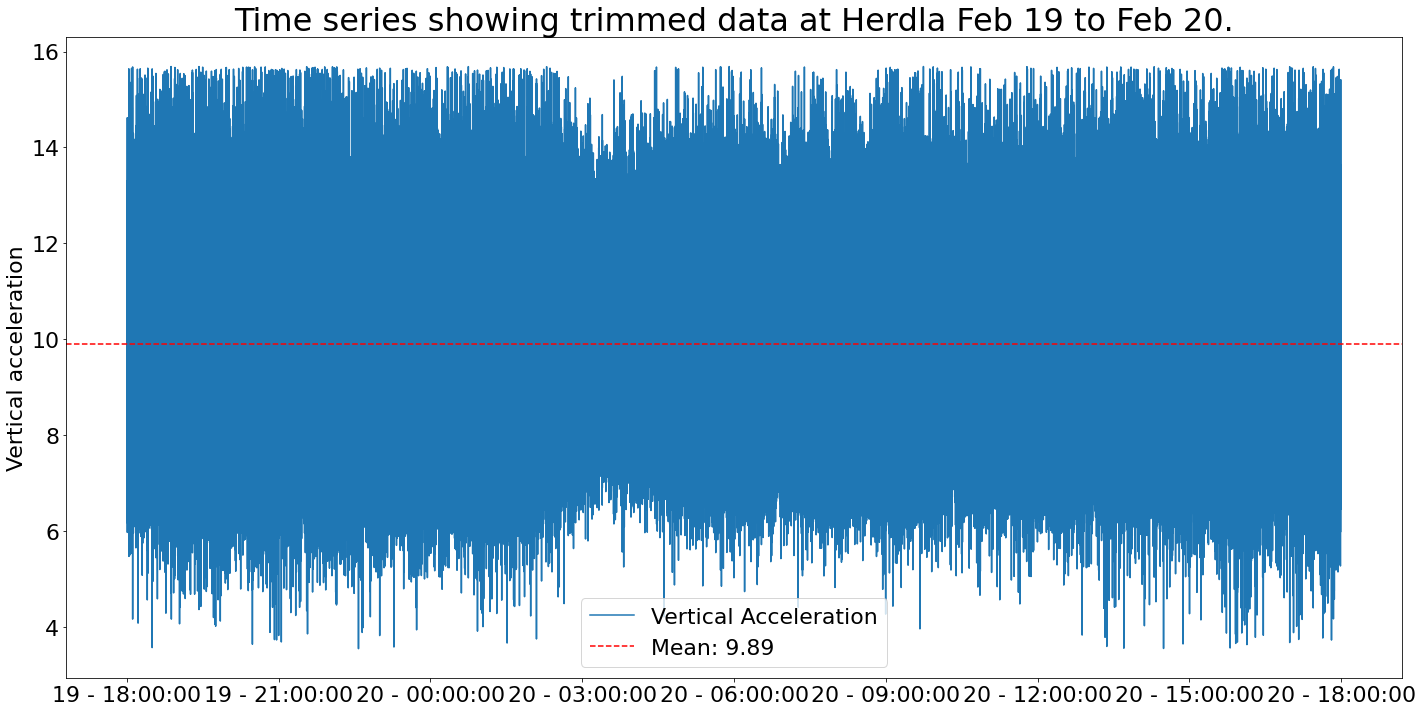

In [21]:

outliers = np.abs((pos_h)-mean_herdla)>(4*standard_dev_herdla)

pos_h_outliers = pos_h[~outliers]
pos_h_outliers


mean_frekhaug = np.mean(pos_f)
var_frekhaug = np.var(pos_f)
median_frekhaug = np.median(pos_f)
standard_dev_frekhaug = np.std(pos_f)


fig, ax = plt.subplots(figsize=(20, 10))
timeFmt = mdates.DateFormatter('%d - %H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)

# table_data = [
#     ["Metric", "Value"],
#     ["Mean", "{:.6f}".format(mean_herdla)],
#     ["Variance",  "{:.6f}".format(var_herdla)],
#     ["Median", "{:.6f}".format(median_h)],
#     ["Standard Deviation", "{:.6f}".format(standard_dev_herdla)]

# ]

# table = ax.table(cellText=table_data, loc='bottom', cellLoc='center', bbox=[0, -0.2, 1, 0.1])
# table.auto_set_font_size(False)
# table.set_fontsize(22)
# table.scale(1, 1.5)

# font = FontProperties(weight='bold')
# for (i, j), cell in table._cells.items():
#     if i == 0:
#         cell.set_text_props(fontproperties=font)


ax.plot(time_h[~outliers], pos_h_outliers, label='Vertical Acceleration')
ax.axhline(y=mean_frekhaug, color='r', linestyle='--', label=f'Mean: {mean_frekhaug:.2f}')
# ax.axhline(y=var_herdla, color='g', linestyle='--', label=f'Variance: {var_herdla:.2f}')
# ax.axhline(y=median_h, color='b', linestyle='--', label=f'Median: {median_h:.2f}')
ax.legend(fontsize = 22)

# ax.set_ylim(-1, 1)
# ax.set_yticks(np.arange(-1, 1, 0.1))

ax.set_title('Time series showing trimmed data at Herdla Feb 19 to Feb 20.', fontsize = 32)
ax.set_ylabel("Vertical acceleration", fontsize = 22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)

plt.tight_layout()
plt.savefig("herdla210trimmed.pdf")
plt.show()


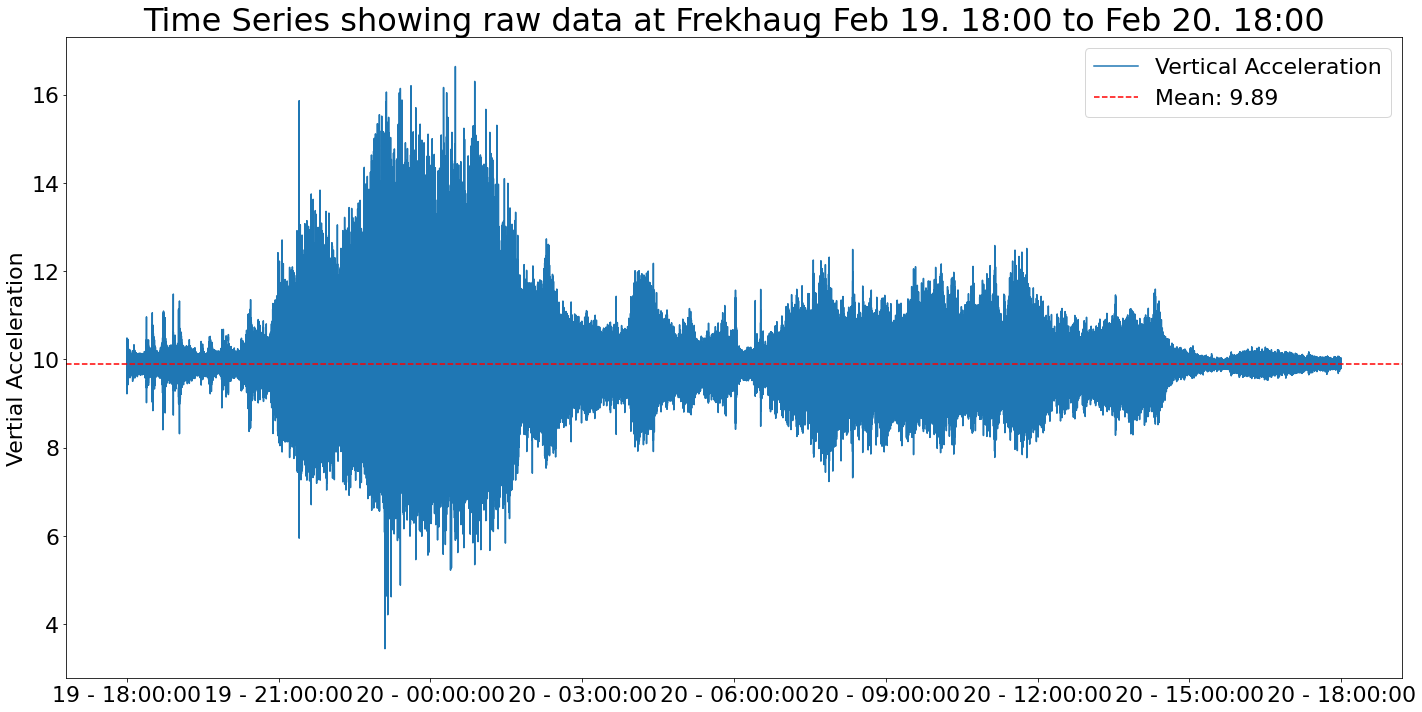

In [11]:

mean_frekhaug = np.mean(pos_f)
var_frekhaug = np.var(pos_f)
median_frekhaug = np.median(pos_f)
standard_dev_frekhaug = np.std(pos_f)


fig, ax = plt.subplots(figsize=(20, 10))
timeFmt = mdates.DateFormatter('%d - %H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)


# table_data = [
#     ["Metric", "Value"],
#     ["Mean", "{:.6f}".format(mean_herdla)],
#     ["Variance",  "{:.6f}".format(var_herdla)],
#     ["Median", "{:.6f}".format(median_h)],
#     ["Standard Deviation", "{:.6f}".format(standard_dev_herdla)]

# ]

# table = ax.table(cellText=table_data, loc='bottom', cellLoc='center', bbox=[0, -0.2, 1, 0.1])
# table.auto_set_font_size(False)
# table.set_fontsize(22)
# table.scale(1, 1.5)

font = FontProperties(weight='bold')
for (i, j), cell in table._cells.items():
    if i == 0:
        cell.set_text_props(fontproperties=font)


    # Create the main plot
ax.plot(time_h, pos_f, label='Vertical Acceleration')
ax.axhline(y=mean_frekhaug, color='r', linestyle='--', label=f'Mean: {mean_frekhaug:.2f}')
# ax.axhline(y=var_herdla, color='g', linestyle='--', label=f'Variance: {var_herdla:.2f}')
# ax.axhline(y=median_h, color='b', linestyle='--', label=f'Median: {median_h:.2f}')
ax.legend(fontsize = 22)

# ax.set_ylim(-1, 1)
# ax.set_yticks(np.arange(-1, 1, 0.1))

ax.set_title('Time Series showing raw data at Frekhaug Feb 19. 18:00 to Feb 20. 18:00', fontsize = 32)
ax.set_ylabel("Vertial Acceleration", fontsize = 22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)
plt.tight_layout()
plt.savefig("raddata210Frek.pdf")
plt.show()


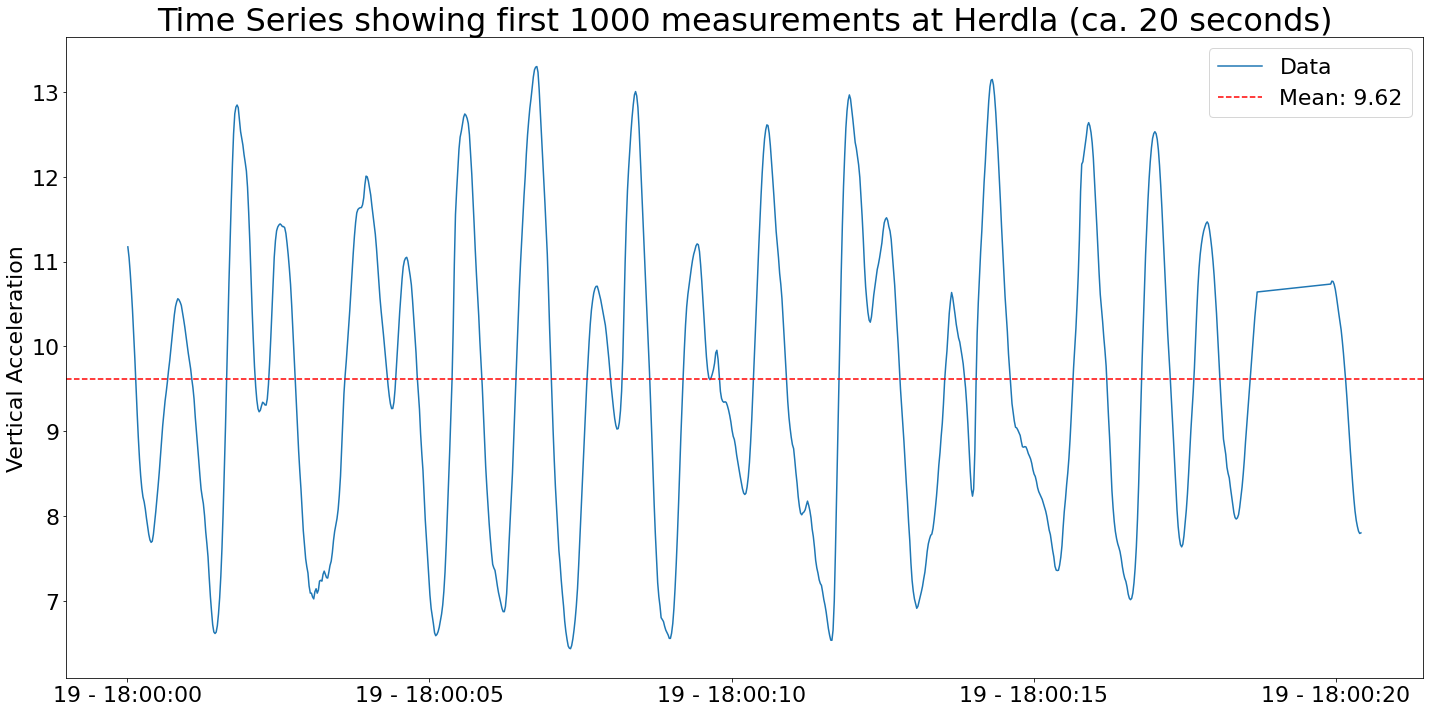

In [12]:
mean_herdla = np.mean(pos_h)
var_herdla = np.var(pos_h)
median_h = np.median(pos_h)
standard_dev_herdla = np.std(pos_h)


fig, ax = plt.subplots(figsize=(20, 10))
timeFmt = mdates.DateFormatter('%d - %H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)

# table_data = [
#     ["Metric", "Value"],
#     ["Mean", "{:.6f}".format(mean_herdla)],
#     ["Variance",  "{:.6f}".format(var_herdla)],
#     ["Median", "{:.6f}".format(median_h)],
#     ["Standard Deviation", "{:.6f}".format(standard_dev_herdla)]

# ]

# table = ax.table(cellText=table_data, loc='bottom', cellLoc='center', bbox=[0, -0.2, 1, 0.1])
# table.auto_set_font_size(False)
# table.set_fontsize(12)
# table.scale(1, 1.5)

# font = FontProperties(weight='bold')
# for (i, j), cell in table._cells.items():
#     if i == 0:
#         cell.set_text_props(fontproperties=font)


ax.plot(time_h[:1000], pos_h[:1000], label='Data')
ax.axhline(y=mean_herdla, color='r', linestyle='--', label=f'Mean: {mean_herdla:.2f}')
# ax.axhline(y=var_herdla, color='g', linestyle='--', label=f'Variance: {var_herdla:.2f}')
# ax.axhline(y=median_h, color='b', linestyle='--', label=f'Median: {median_h:.2f}')
ax.legend(fontsize = 22)
# ax.set_ylim(-1, 1)
# ax.set_yticks(np.arange(-1, 1, 0.1))

ax.set_title('Time Series showing first 1000 measurements at Herdla (ca. 20 seconds)', fontsize = 32)
ax.set_ylabel("Vertical Acceleration", fontsize = 22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)
plt.tight_layout()
plt.savefig("first1000measureHerdla.pdf")
plt.show()


[ 9.943421 10.025424 10.120595 ...  9.952998  9.951202  9.944618]


C:\Users\victo\AppData\Local\Temp\ipykernel_12392\2943990308.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


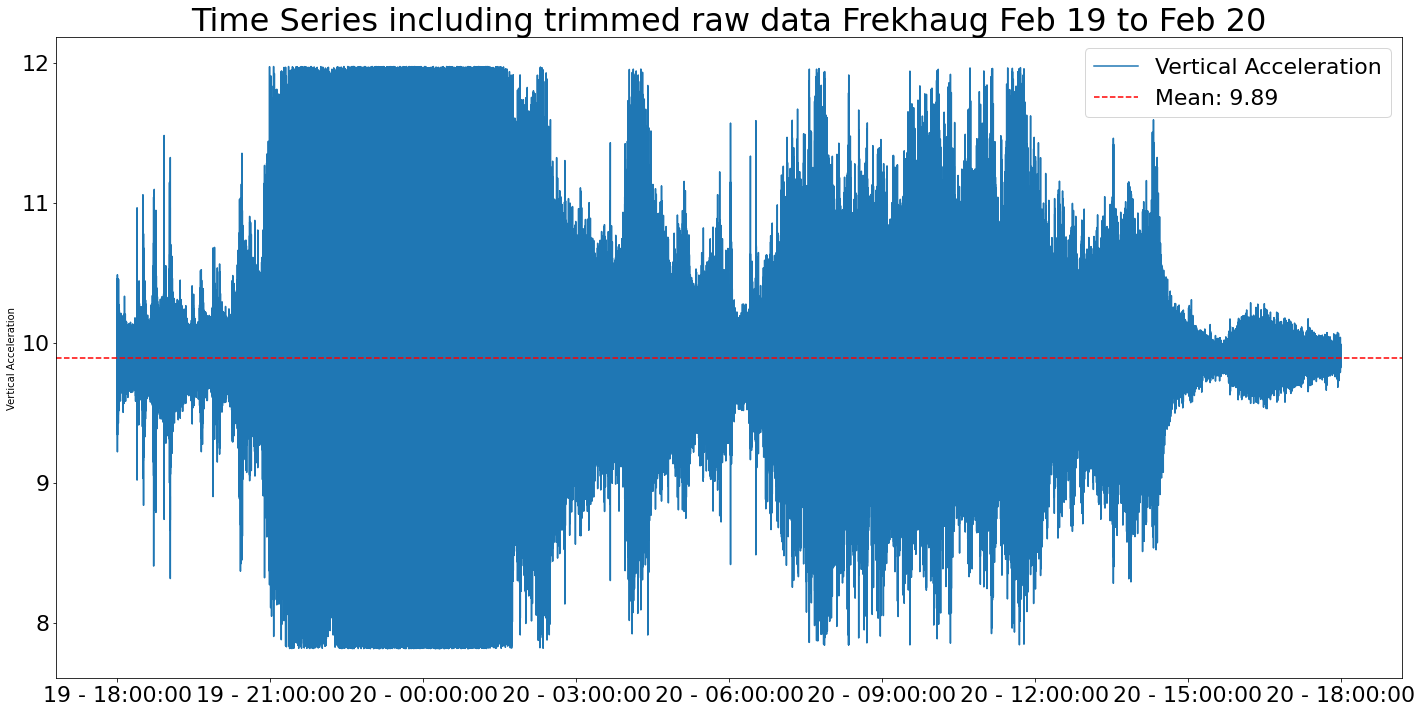

In [13]:

mean_frekhaug = np.mean(pos_f)
var_frekhaug = np.var(pos_f)
median_frekhaug = np.median(pos_f)
standard_dev_frekhaug = np.std(pos_f)



outliers_f = np.abs((pos_f)-mean_frekhaug)>(4*standard_dev_frekhaug)

pos_f_outliers = pos_f[~outliers_f]
print(pos_f_outliers)

fig, ax = plt.subplots(figsize=(20, 10))
timeFmt = mdates.DateFormatter('%d - %H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)

# table_data = [
# #     ["Metric", "Value"],
# #     ["Mean", "{:.6f}".format(mean_herdla)],
# #     ["Variance",  "{:.6f}".format(var_herdla)],
# #     ["Median", "{:.6f}".format(median_h)],
#     ["Standard Deviation", "{:.6f}".format(standard_dev_herdla)]

# ]

# table = ax.table(cellText=table_data, loc='bottom', cellLoc='center', bbox=[0, -0.2, 1, 0.1])
# table.auto_set_font_size(False)
# table.set_fontsize(12)
# table.scale(1, 1.5)

font = FontProperties(weight='bold')
for (i, j), cell in table._cells.items():
    if i == 0:
        cell.set_text_props(fontproperties=font)


ax.plot(time_h[~outliers_f], pos_f_outliers, label='Vertical Acceleration')
ax.axhline(y=mean_frekhaug, color='r', linestyle='--', label=f'Mean: {mean_frekhaug:.2f}')
# ax.axhline(y=var_herdla, color='g', linestyle='--', label=f'Variance: {var_herdla:.2f}')
# ax.axhline(y=median_h, color='b', linestyle='--', label=f'Median: {median_h:.2f}')
ax.legend(fontsize = 22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)


# ax.set_ylim(-1, 1)
# ax.set_yticks(np.arange(-1, 1, 0.1))

ax.set_title('Time Series including trimmed raw data Frekhaug Feb 19 to Feb 20', fontsize = 32)
ax.set_ylabel("Vertical Acceleration")
plt.tight_layout()
plt.savefig("trimmed210Frekhaug.pdf")
plt.show()


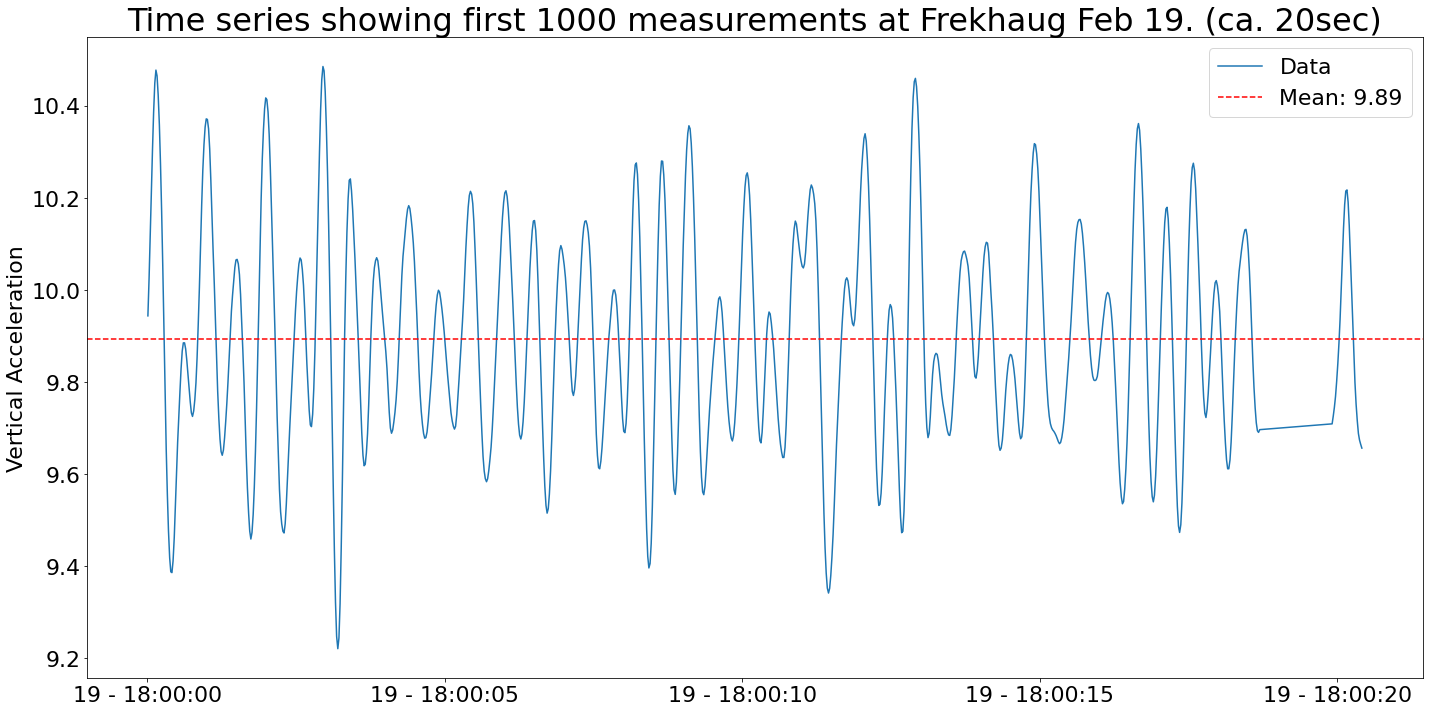

In [14]:

fig, ax = plt.subplots(figsize=(20, 10))
timeFmt = mdates.DateFormatter('%d - %H:%M:%S')
plt.gca().xaxis.set_major_formatter(timeFmt)

# table_data = [
#     ["Metric", "Value"],
#     ["Mean", "{:.6f}".format(mean_herdla)],
#     ["Variance",  "{:.6f}".format(var_herdla)],
#     ["Median", "{:.6f}".format(median_h)],
#     ["Standard Deviation", "{:.6f}".format(standard_dev_herdla)]

# ]

# table = ax.table(cellText=table_data, loc='bottom', cellLoc='center', bbox=[0, -0.2, 1, 0.1])
# table.auto_set_font_size(False)
# table.set_fontsize(12)
# table.scale(1, 1.5)

font = FontProperties(weight='bold')
for (i, j), cell in table._cells.items():
    if i == 0:
        cell.set_text_props(fontproperties=font)


ax.plot(time_h[:1000], pos_f[:1000], label='Data')
ax.axhline(y=mean_frekhaug, color='r', linestyle='--', label=f'Mean: {mean_frekhaug:.2f}')
# ax.axhline(y=var_herdla, color='g', linestyle='--', label=f'Variance: {var_herdla:.2f}')
# ax.axhline(y=median_h, color='b', linestyle='--', label=f'Median: {median_h:.2f}')
ax.legend(fontsize = 22)

# ax.set_ylim(-1, 1)
# ax.set_yticks(np.arange(-1, 1, 0.1))

ax.set_title('Time series showing first 1000 measurements at Frekhaug Feb 19. (ca. 20sec)', fontsize  =32 )
ax.set_ylabel("Vertical Acceleration", fontsize = 22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)
plt.tight_layout()
plt.savefig('first1000measureFrekhaug.pdf')
plt.show()


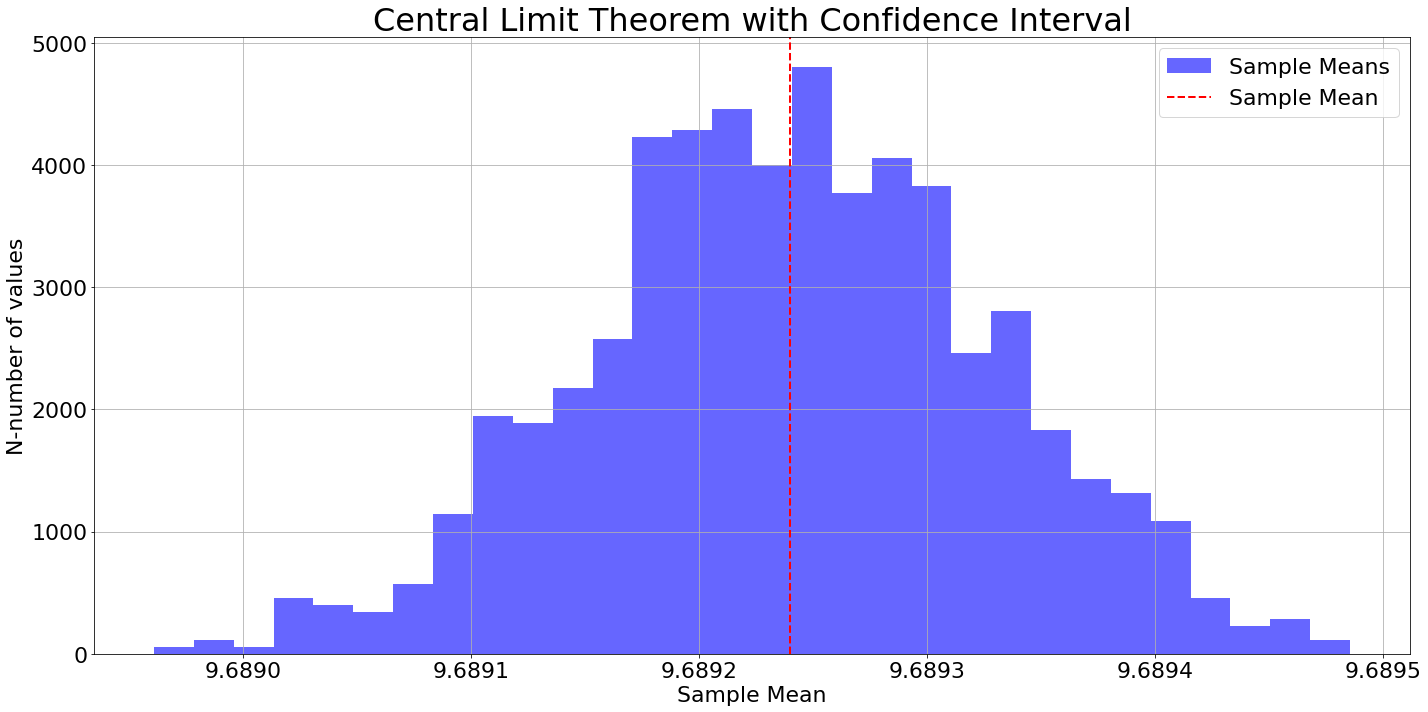

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats

# Load the dataset (replace 'herdla.nc' with the actual dataset path)
dataset = xr.open_dataset('herdla.nc')

# Select the variable of interest from the dataset
variable_of_interest = dataset['w_z']

# Set the sample size (number of data points in each sample)
sample_size = 4000

# Set the number of samples to generate
num_samples = 1000

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Create an array to store the sample means
sample_means = []

# Use the first 5000 data points for all samples
data_subset = variable_of_interest[:5000]

# Generate multiple samples and calculate the means over the fixed data subset
for _ in range(num_samples):
    sample_indices = np.random.choice(len(data_subset), sample_size, replace=False)
    sample_data = data_subset[sample_indices]
    sample_mean = sample_data.mean().item()
    sample_means.append(sample_mean)

# Calculate the standard error of the sample means
std_error = np.std(sample_means, ddof=1) / np.sqrt(sample_size)

# Determine the Z-score for the desired confidence level (assuming normal distribution)
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_score * std_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = np.mean(sample_means) - margin_of_error
upper_bound = np.mean(sample_means) + margin_of_error

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Table data
# table_data = [
#     ["Mean", "{:.5f}".format(np.mean(sample_means))],
#     ["Lower Boundary", "{:.6f}".format(lower_bound)],
#     ["Upper Boundary", "{:.6f}".format(upper_bound)],
# ]


# # Add spacing between the table and the figure
# table = ax.table(cellText=table_data, loc='bottom', cellLoc='center', bbox=[0, -0.2, 1, 0.1])
# table.auto_set_font_size(False)
# table.set_fontsize(22)
# table.scale(1, 1.5)

# Plot the histogram of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b', label='Sample Means')
plt.axvline(np.mean(sample_means), color='r', linestyle='dashed', linewidth=2, label='Sample Mean')

plt.xlabel('Sample Mean', fontsize = 22)
plt.ylabel('N-number of values', fontsize = 22)
plt.title('Central Limit Theorem with Confidence Interval', fontsize = 32)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis = 'y', labelsize = 22)
ax.legend(fontsize = 22)
plt.grid(True)
plt.tight_layout()
plt.savefig("CLTConfidenceHerdla.pdf")
plt.show()


In [18]:

# Population parameters
population_mean = 9.81  # Null hypothesis: Mean wave acceleration is exactly 10
standard_dev_herdla_out = pos_h_outliers.std() # Provide the known standard deviation

sample_mean = pos_h_outliers.mean() # Calculate the sample mean based on your data
n = 5000  

z_test_statistic = (sample_mean - population_mean) / (standard_dev_herdla / (n ** 0.5))

# Calculate the one-tailed p-value (since H1 is waves are less than 10)
p_value = norm.cdf(z_test_statistic)

alpha = 0.05

print(p_value)

# Compare the p-value to the significance level and make a decision
if p_value <= alpha:
    print("Reject the null hypothesis: The mean wave acceleration is less than 10.")
else:
    print("Fail to reject the null hypothesis: The mean wave acceleration is not less than 10.")




4.5293921119620363e-20
Reject the null hypothesis: The mean wave acceleration is less than 10.
